In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
import numpy as np
import itertools
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import KFold
from sklearn import tree
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [3]:
plt.rcParams.update({'font.size': 18})

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
pd.options.display.max_columns = None

In [6]:
display(df.head(20))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


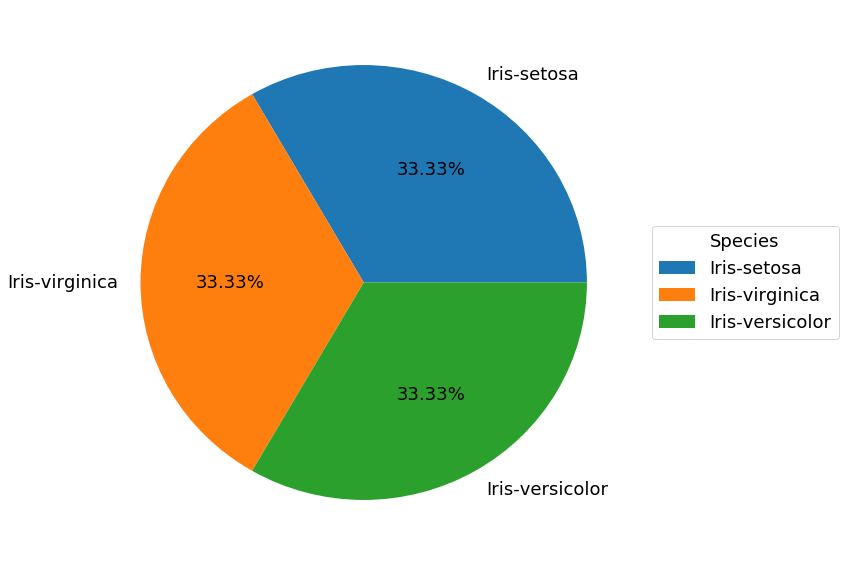

In [9]:
# Распределение видов в данных
fig1, ax1 = plt.subplots(figsize = (10,10))
patches, texts, autotexts = ax1.pie(df['Species'].value_counts(), autopct='%0.2f%%', labels=list(df['Species'].value_counts().index))
ax1.legend(patches, list(df['Species'].value_counts().index),
          title="Species",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [10]:
sns.set(font_scale=1.2) 

C:\Users\Natalia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


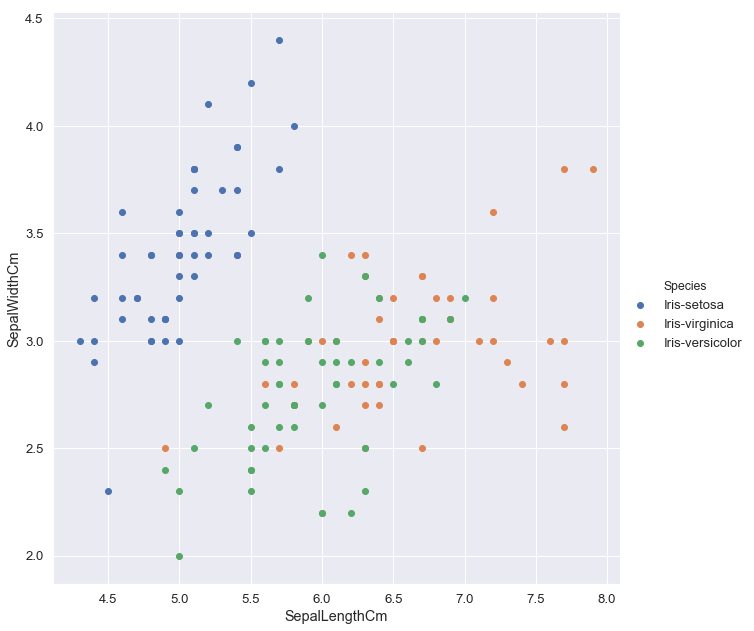

In [11]:
# Зависимость ширины чашелистника от длины для каждого вида
sns.FacetGrid(df, hue="Species", hue_order = list(df['Species'].value_counts().index),size=9) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

C:\Users\Natalia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Natalia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


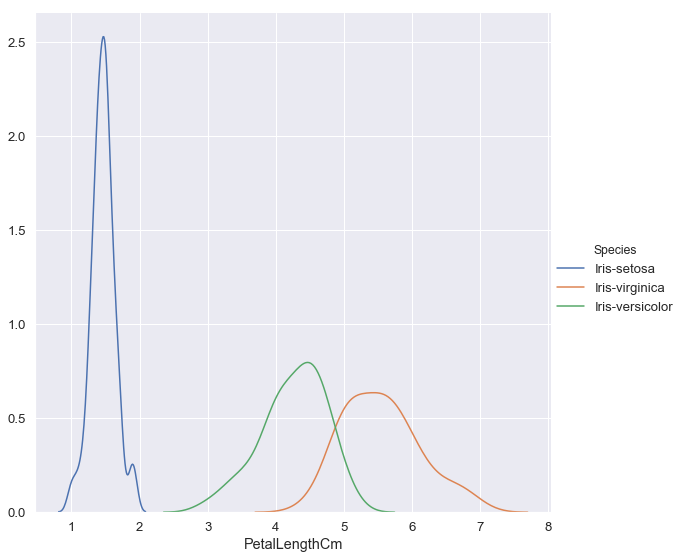

In [12]:
# распределение длины листков для каждого вида
sns.FacetGrid(df, hue="Species", hue_order = list(df['Species'].value_counts().index), size=8) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

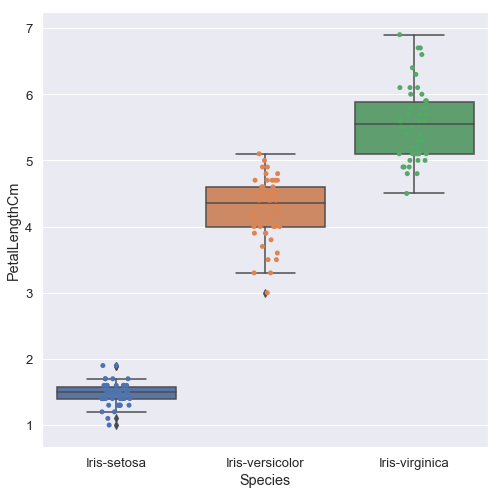

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", jitter=True, data=df, edgecolor="blue")

### Outlier detection

In [14]:
def seperation(n):
    
    if n%2==0:
        lower = int(n/2-2)
        upper = int(n/2)
    else:
        lower = int(n/2-1)
        upper = int((n+1)/2)
    return lower,upper

In [15]:
def outliers_bound(column):
    column = column.sort_values()
    median = column.median()
    n = len(column)
    lower, upper = seperation(n)
    lower_val_median = column[:lower].median()
    upper_val_median = column[upper:].median()
    iqr = upper_val_median - lower_val_median
    upper_bound = upper_val_median + 1.5*iqr
    lower_bound = lower_val_median - 1.5*iqr
    
    return lower_bound, upper_bound
    

In [20]:
def outlier_del(df,col_name):
    species = list(df['Species'].value_counts().index)
    
    for exemplar in species:
        lower_bound, upper_bound = outliers_bound(df[col_name])
        index = df.loc[(df['Species']==exemplar)&(df[col_name]<lower_bound)&(df[col_name]>upper_bound)].index
        df.drop(index, inplace=True)
    return df

In [21]:
for col in df.columns[1:5]:
    df = outlier_del(df,col)

### Data preprocessing

In [23]:
X = df.values[:, 1:5]

In [24]:
y = df.values[:, 5]

## SVM with Leave-P-Out Cross Validation

In [25]:
lpo = LeavePOut(1)
lpo.get_n_splits(X)

150

In [26]:
y_true = []
y_pred = []
for train_index, test_index in lpo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = svm.SVC(gamma=0.1, decision_function_shape='ovr')
        clf.fit(X_train, y_train)
        for i, elem in enumerate(X_test):
            y_pred.append(clf.predict([elem])[0])
            y_true.append(y_test[i])

In [27]:
cnf_matrix = confusion_matrix(y_true, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.96 0.04]
 [0.   0.04 0.96]]


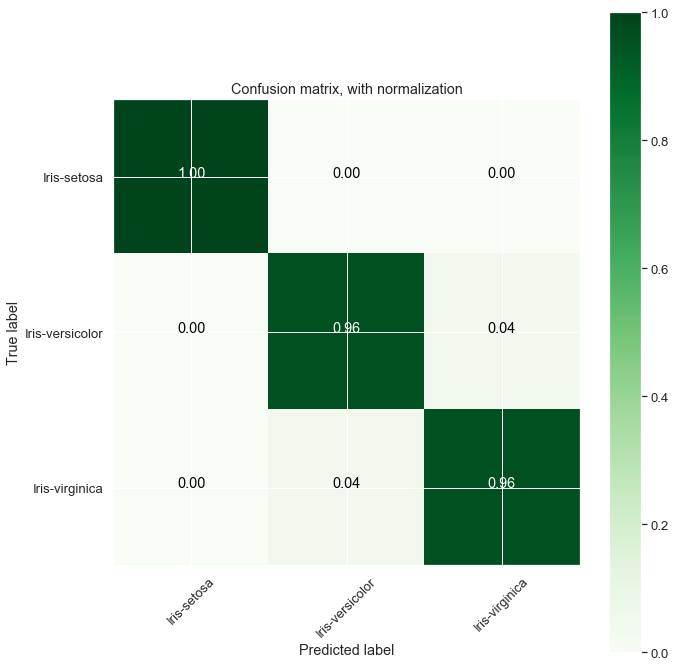

In [28]:
plt.figure(figsize = (10,10))
plot_confusion_matrix(cnf_matrix, normalize=True, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                      title='Confusion matrix, with normalization')

## SVM with k-fold validation

In [29]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [30]:
y_true = []
y_pred = []
for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = svm.SVC(gamma=0.1, decision_function_shape='ovr')
        clf.fit(X_train, y_train)
        for i, elem in enumerate(X_test):
            y_pred.append(clf.predict([elem])[0])
            y_true.append(y_test[i])

In [31]:
cnf_matrix = confusion_matrix(y_true, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.12 0.88]]


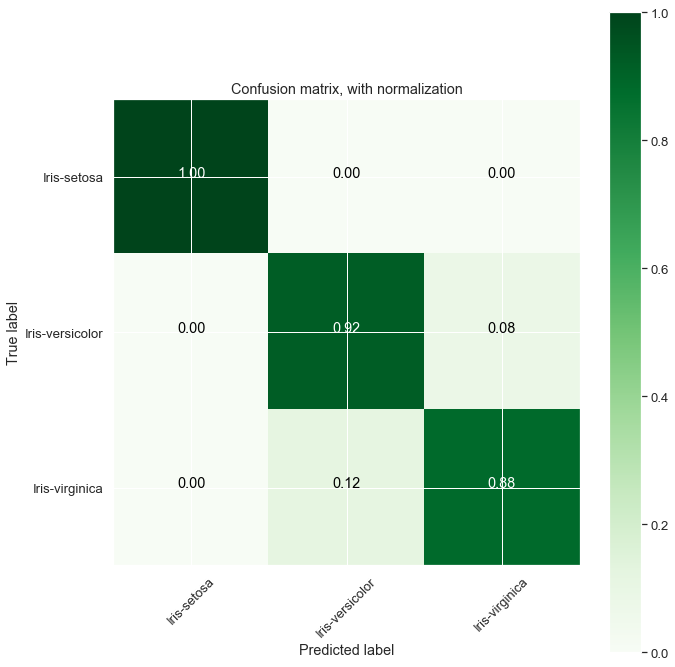

In [32]:
plt.figure(figsize = (10,10))
plot_confusion_matrix(cnf_matrix, normalize=True, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                      title='Confusion matrix, with normalization')

### DesicionTree Leave-P-Out Cross Validation

In [33]:
lpo = LeavePOut(1)
lpo.get_n_splits(X)

150

In [34]:
y_true = []
y_pred = []
for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = tree.DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        for i, elem in enumerate(X_test):
            y_pred.append(clf.predict([elem])[0])
            y_true.append(y_test[i])

In [35]:
cnf_matrix = confusion_matrix(y_true, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.1  0.9 ]]


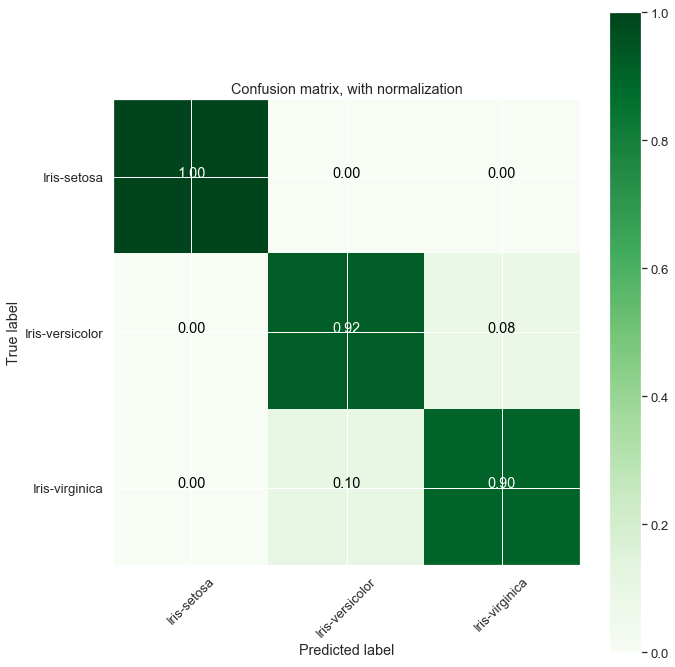

In [36]:
plt.figure(figsize = (10,10))
plot_confusion_matrix(cnf_matrix, normalize=True, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                      title='Confusion matrix, with normalization')

### DecisionTree k-folds validation

In [37]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [38]:
y_true = []
y_pred = []
for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = tree.DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        for i, elem in enumerate(X_test):
            y_pred.append(clf.predict([elem])[0])
            y_true.append(y_test[i])

In [39]:
cnf_matrix = confusion_matrix(y_true, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.08 0.92]]


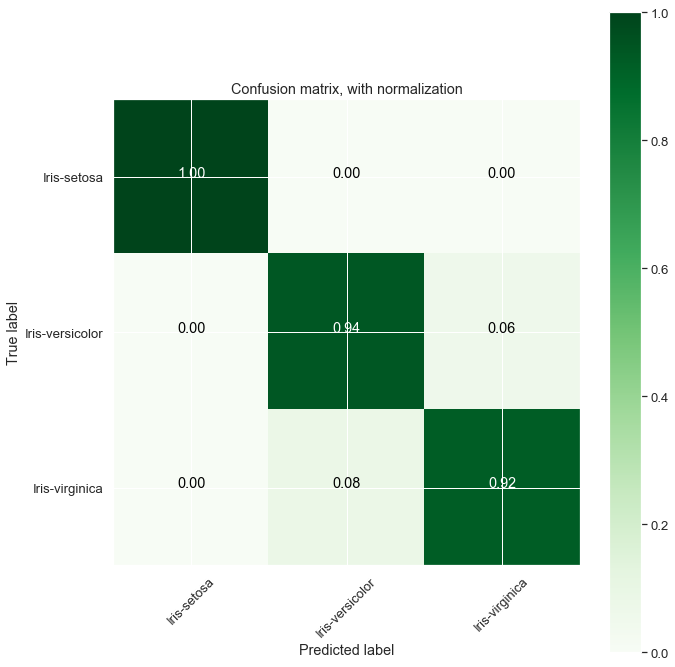

In [40]:
plt.figure(figsize = (10,10))
plot_confusion_matrix(cnf_matrix, normalize=True, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                      title='Confusion matrix, with normalization')